# Identification of Tomato NRC Sensor homologs. Heatmap plot

## Step 1: Load dataframes

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Loading the phylogenetic tree tips, which were previously extracted from the newick file through a simple bash script (can be provided upon request).
tips_df = pd.read_csv('/Path_to_tips_file/Heatmap_analysis_tree_tips.csv',header=None)

# Parsing the format of the tips
tips_df = tips_df.replace("'", '', regex=True)
tips_df = tips_df.replace(" ", '', regex=True)
tips = list(tips_df[0])
tips = [item.rstrip('_') for item in tips]

In [13]:
# Loading the dataframe with the expression data
expression_df = pd.read_csv('/Path_to_expression_file/Heatmap_analysis_NRC_S_expression_data.csv')

# We calculate the mean expression per organ, and add it to the expression_df dataframe
expression_df['Leaf_Mean'] = expression_df[['L1','L2','L3']].mean(axis=1)
expression_df['Root_Mean'] = expression_df[['R1','R2','R3']].mean(axis=1)

# We calculate the logarithm of the mean expression per organ, and add it to the expression_df dataframe
expression_df['Log_Leaf_Mean'] = np.log(expression_df['Leaf_Mean']+1)
expression_df['Log_Root_Mean'] = np.log(expression_df['Root_Mean']+1)

In [14]:
expression_df

,Full,ID,L1,L2,L3,R1,R2,R3,Leaf_Mean,Root_Mean,Log_Leaf_Mean,Log_Root_Mean
0,MSTRG.99|Solyc00g102400.3,Solyc00g102400.3,32.697286,79.401601,24.208445,1133.497454,1075.603228,965.398387,45.435777,1058.166356,3.838070,6.965237
1,MSTRG.1321|Solyc01g087200.3,Solyc01g087200.3,1252.306051,1086.625614,1337.516608,299.363073,203.052902,133.080619,1225.482758,211.832198,7.111906,5.360504
2,MSTRG.3074|Solyc02g027080.2,Solyc02g027080.2,2638.670974,3008.438438,2828.353370,4227.823038,4654.476211,4556.883391,2825.154261,4479.727547,7.946672,8.407541
3,MSTRG.3664|Solyc02g070410.2,Solyc02g070410.2,11.444050,0.000000,0.000000,317.052709,352.587985,320.295727,3.814683,329.978807,1.571670,5.802054
4,MSTRG.7534|Solyc04g007490.3,Solyc04g007490.3,1710.068054,1898.286424,2007.283597,4820.425848,4433.584036,4298.052866,1871.879358,4517.354250,7.535232,8.415903
...,...,...,...,...,...,...,...,...,...,...,...,...
80,MSTRG.11597|Solyc06g064780.1,Solyc06g064780.1,0.000000,0.000000,0.000000,33.338160,41.450076,41.164768,0.000000,38.651001,0.000000,3.680116
81,Solyc06g065000.2|Solyc06g065000.2,Solyc06g065000.2,0.000000,7.352000,0.000000,39.461496,58.239980,44.548173,2.450667,47.416550,1.238567,3.879842
82,Solyc09g064690.1|Solyc09g064690.1,Solyc09g064690.1,0.000000,0.000000,0.000000,0.000000,0.000000,2.255604,0.000000,0.751868,0.000000,0.560683
83,MSTRG.20721|Solyc12g017800.2,Solyc12g017800.2,0.000000,0.000000,0.000000,1431.499786,1460.196967,935.511638,0.000000,1275.736130,0.000000,7.152062


In [15]:
# Filter DataFrame
filtered_df = expression_df[(expression_df['ID'].isin(tips))]

In [16]:
# We make a list of the values to plot. These must be both present in the tips list (based on the phylogenetic tree) and in the expression dataset.
leaf_log_mean_list = []
root_log_mean_list = []

for tip in tips:
    if tip in list(filtered_df['ID']):
        leaf_log_mean_value = filtered_df[filtered_df['ID'] == tip]['Log_Leaf_Mean'].iloc[0]
        leaf_log_mean_list.append(leaf_log_mean_value)
        
        root_log_mean_value = filtered_df[filtered_df['ID'] == tip]['Log_Root_Mean'].iloc[0]
        root_log_mean_list.append(root_log_mean_value)
                                  
    else:
        leaf_log_mean_list.append(None)
        root_log_mean_list.append(None)
                                  
    


In [17]:
# We create the dataframe to make the heatplot
df_heatmap = pd.DataFrame()
df_heatmap['Tips'] = tips
df_heatmap['leaf_log_mean'] = leaf_log_mean_list
df_heatmap['root_log_mean'] = root_log_mean_list

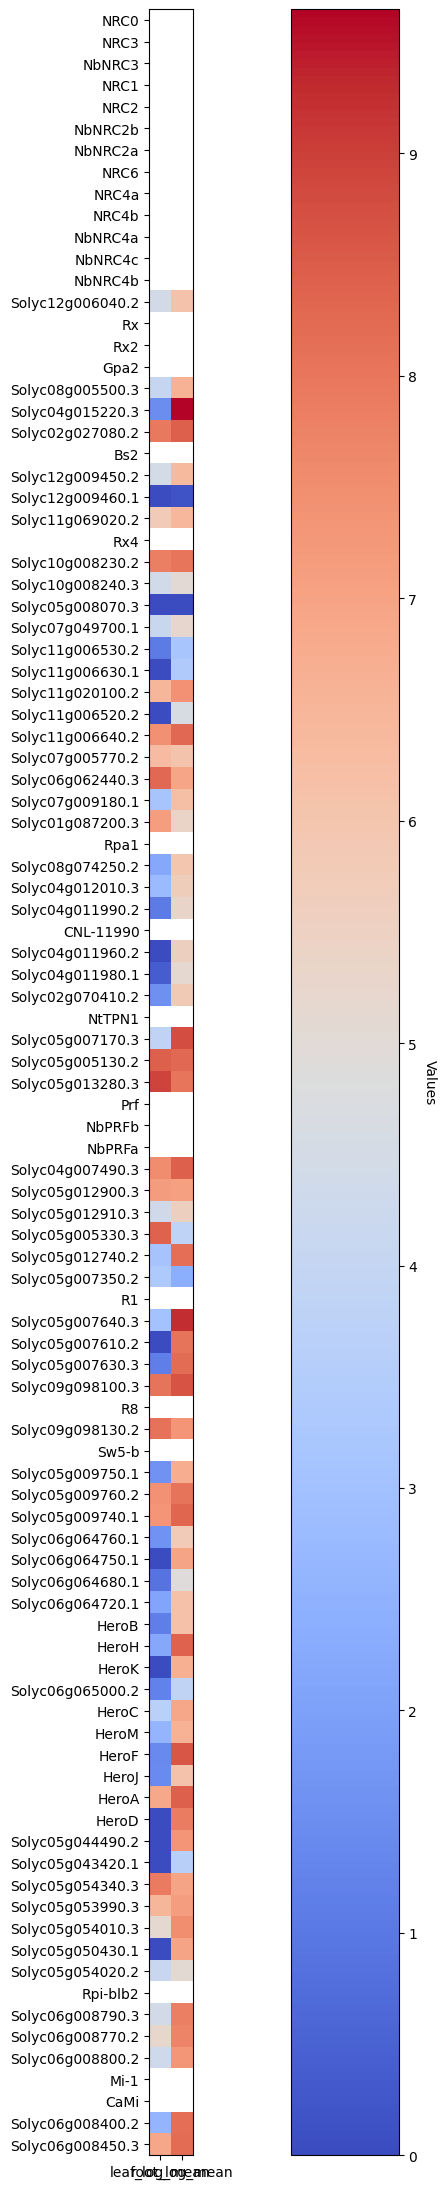

In [18]:
# For simplicity we call df_heatmap df
df = df_heatmap  

# Plot heatmap 
fig, ax = plt.subplots(figsize=(20, 22))
im = ax.imshow(df[['leaf_log_mean', 'root_log_mean']].values, 
               cmap='coolwarm')

# Create colorbar
colorbar = fig.colorbar(im, ax=ax)
colorbar.ax.set_ylabel('Values', rotation=-90, va="bottom")  

# Set colorbar tick locations and labels
colorbar_ticks = list(range(0, 10, 1))
colorbar_ticks_str = list(map(lambda x: str(x), colorbar_ticks))
colorbar.ax.set_yticks(colorbar_ticks)
colorbar.ax.set_yticklabels(colorbar_ticks_str) 

# Set xticks and yticks
ax.set_xticks(np.arange(len(df.columns[1:])))
ax.set_yticks(np.arange(len(df.index)))  
ax.set_xticklabels(['leaf_log_mean', 'root_log_mean'])
ax.set_yticklabels(df['Tips'])

# Adjust layout
fig.tight_layout()

# Save figure as SVG
fig.savefig('heatmap.svg')
plt.show()